# Homework A (Bonus - 1 points)
We want to study the impact of discount factor using the endowments (income) in the first and second periods, and interest rate given below on the first and second period consumption, and saving amount. 

y_0 = 1, 
y_1 = 1, 
r = 0.05

Use values from 0.9 to 0.99 with 0.01 increments for beta and create table to show the values of c_0, c_1, a, and utility for each value of beta. Explain how consumption and savings change with the increase in beta. Why?

To solve, you need to insert equations for optimal level of c_0, c_1, a and use the logarithmich utility function to derive the values of c_0, c_1, a, and utility at the optimal level of c_0 and c_1.

In [2]:
# Make graphs appear within the notebook
%matplotlib inline

# Import numerical computations library
import numpy as np

# Import data manipulation library
import pandas as pd
# Import plotting library
import matplotlib.pyplot as plt

# Import minimization function
from scipy.optimize import minimize

# Import optimization function
import scipy.optimize as opt

# Parameters

params = {'y_0':1, 'y_1':1, 'r':0.05, 'beta':0.9}

def discount_impact(β_min=0.9, β_max=0.99, increment=0.01, params=params):
    β_values = np.arange(β_min, β_max+increment, increment)
    c_0_opt_values = []
    c_1_opt_values = []
    a_vlues = []
    U_values = []
    for β in β_values:
        y_0 = params['y_0']
        y_1 = params['y_1']
        r = params['r']
        c_0_opt = 1/(1+β) * (y_0 + y_1/(1+r))
        c_1_opt = β*(1+r)*c_0_opt
        a = β/(1+β) * y_0 - 1/(1+β) * y_1/(1+r)
        U_opt = np.log(c_0_opt) + β*np.log(c_1_opt)
        c_0_opt_values.append(c_0_opt)
        c_1_opt_values.append(c_1_opt)
        a_vlues.append(a)
        U_values.append(U_opt)
    # return table of combined values
    data_table = pd.DataFrame({'β': β_values, 'c_0_opt': c_0_opt_values, 'c_1_opt': c_1_opt_values, 'stock of asset':a_vlues, 'U_opt': U_values})
    return data_table

<Axes: title={'center': 'Optimal Stock of Asset vs. Discount Factor β'}, xlabel='Discount Factor β', ylabel='Optimal Stock of Asset'>

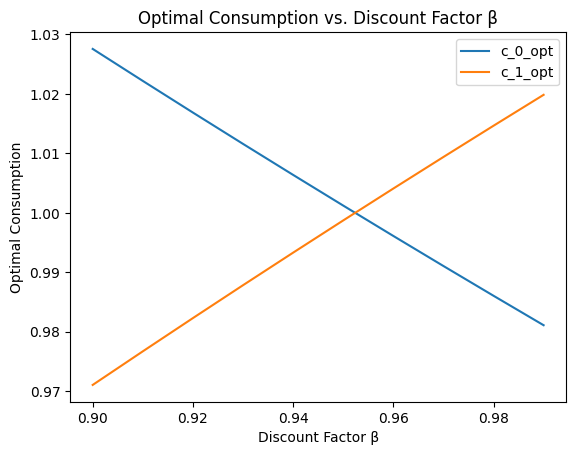

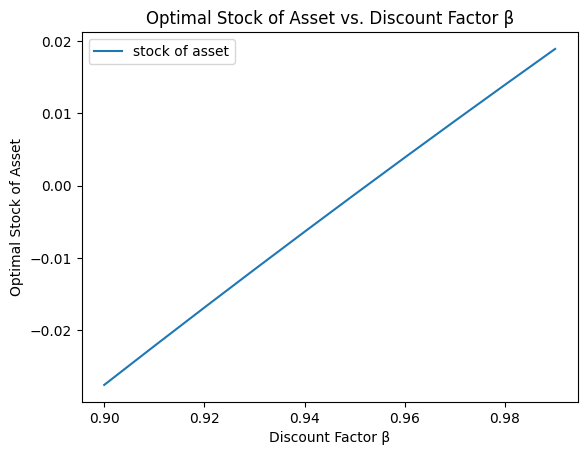

In [5]:
task_A_results = discount_impact()
task_A_results.head()
task_A_results.plot(x='β', y=['c_0_opt', 'c_1_opt'], title='Optimal Consumption vs. Discount Factor β', ylabel='Optimal Consumption', xlabel='Discount Factor β')
task_A_results.plot(x='β', y='stock of asset', title='Optimal Stock of Asset vs. Discount Factor β', ylabel='Optimal Stock of Asset', xlabel='Discount Factor β')

# Homework B (Compulsory - 5 points)
Assume that there are two countries that share the following same values in the following parameters:

\begin{align}
\delta=0.1, \alpha=0.33, \sigma=2, \beta=0.96
\end{align}

Conduct the following fiscal policy experiments, derive steady-state level of capital and consumption per effective labor and display them in phase diagram:


In [24]:
# Define necessary functions

def SteadyState_Fiscal(params,fiscal):
    α = params['α']
    δ = params['δ']
    β = params['β']
    σ = params['σ']
    ρ = 1/β-1
    
    g = fiscal['g']
    tau_a = fiscal['tau_a']
    tau_f = fiscal['tau_f']
    
    k_star = (α/((ρ/((1-tau_a)*(1-tau_f)))+δ))**(1/(1-α))
    g_star = g*k_star**α
    c_star = k_star**(α) - (δ)*k_star - g_star
    
    return k_star, c_star

def ResourceConstraint_Fiscal(k, c, params, fiscal):
    α = params['α']
    δ = params['δ']
    g = fiscal['g']
    
    return k**α+(1-δ)*k-c-g*k**α

def EulerEquation_Fiscal(k, c, params, fiscal):
    α = params['α']
    β = params['β']
    σ = params['σ']
    δ = params['δ']
    
    g = fiscal['g']
    tau_f = fiscal['tau_f']
    tau_a = fiscal['tau_a']

    k_next = ResourceConstraint_Fiscal(k, c, params, fiscal)
    
    if k_next > 0:
        r_next= (1-tau_f)*(α*k_next**(α-1)-δ)
        c_next = (β*(1+(1-tau_a)*r_next))**(1/σ) * c 
        return c_next
    else:
        return 0

def Constant_k_Fiscal(k, params, fiscal):
    δ = params['δ']
    α = params['α']

    g = fiscal['g']

    
    return (1-g)*k**α - δ*k




In [33]:
# Import minimization function
from scipy.optimize import minimize

# Forward equations and convergence criterion

def Path_Fiscal(c_0, k_0, params, fiscal, T=100):
    
    T += 1
    
    k_t = np.zeros(T)
    c_t = np.zeros(T)
    
    k_t[0] = k_0
    c_t[0] = c_0
    
    for t in range(T-1):
        k_t[t+1] = ResourceConstraint_Fiscal(k_t[t], c_t[t], params, fiscal)
        if k_t[t+1] > 0:
            c_t[t+1] = EulerEquation_Fiscal(k_t[t], c_t[t], params, fiscal)
        else:
            k_t[t+1] = 0
            c_t[t+1] = 0
            
    return k_t, c_t

def Path_crit_Fiscal(c_0, k_0, params, fiscal, T=100):
    
    k_t, c_t = Path_Fiscal(c_0, k_0, params, fiscal, T)
    k_star, c_star = SteadyState_Fiscal(params, fiscal)
    
    ss_diff = np.sqrt((k_t-k_star)**2 + (c_t-c_star)**2)
    
    return np.min(ss_diff) + ss_diff[-1]

In [ ]:


def solution(params, fiscal_1, fiscal_2):
    
    # Steady state
    print(SteadyState_Fiscal(params,tax_params_1))
    k_star_1, c_star_1 = SteadyState_Fiscal(params,tax_params_1)

    print(SteadyState_Fiscal(params,tax_params_2))
    k_star_2, c_star_2 = SteadyState_Fiscal(params,tax_params_2)

    # Find the function minimum, starting from an initial guess

    # First country

    k_0_1=k_star_1/20

    result= minimize(Path_crit_Fiscal, 0.34, args=(k_0_1, params, tax_params_1, 100), method='Nelder-Mead')
    print(result)

    c_0_1 = result.x

    # Second country
    k_0_2=k_star_1/20

    result= minimize(Path_crit_Fiscal, 0.34, args=(k_0_2, params, tax_params_2, 100), method='Nelder-Mead')
    print(result)

    c_0_2 = result.x
    # Phase diagram
    k_t_1, c_t_1 = Path_Fiscal(c_0_1, k_0_1, params, tax_params_1, 50)
    k_t_2, c_t_2 = Path_Fiscal(c_0_2, k_0_2, params, tax_params_2, 50)

    kk_1 = np.linspace(0, 1.5*k_star_1, 1000)
    cc_1 = np.linspace(0, 1.5*c_star_1, 1000)
    kk_2 = np.linspace(0, 1.5*k_star_2, 1000)
    cc_2 = np.linspace(0, 1.5*c_star_2, 1000)

    plt.plot(kk_1, Constant_k_Fiscal(kk_1, params, tax_params_1), lw=2, label='$\\Delta \\hat{k}^{1}_{t+1}=0$')
    plt.plot(kk_1**0 * k_star_1, cc_1, lw=2, label='$\\Delta \\hat{c}^{1}_{t+1}=0$')
    plt.plot(k_star_1, c_star_1, 'ro', label='Country 1 SS')
    #plt.plot(k_t_1, c_t_1, 'k-', label='Saddle path')
    plt.plot(kk_2, Constant_k_Fiscal(kk_2, params, tax_params_2), lw=2, label='$\\Delta \\hat{k}^{2}_{t+1}=0$')
    plt.plot(kk_2**0 * k_star_2, cc_2, lw=2, label='$\\Delta \\hat{c}^{2}_{t+1}=0$')
    plt.plot(k_star_2, c_star_2, 'yo', label='Country 2 SS')
    #plt.plot(k_t_2, c_t_2, 'k-', label='Saddle path')

    plt.title('Phase diagram of Country 1 & 2')
    plt.xlabel('Capital per effective labor $\\hat{k}$')
    plt.ylabel('Consumption per effective labor $\\hat{c}$')
    plt.legend(loc='lower right')

    plt.show()

    plt.plot()

    return


### Question 1

The following tax rates and government spending are zero in the two countries:

\begin{align}
\tau, \tau^{c}, \tau^{f}, \tau^{w}, g
\end{align}

The capital tax rate and government transfers are zero in the first but positive in the second country:

\begin{align}
\tau^{a}_{1}=v_{1}=0\\
\tau^{a}_{2}=0.2,v_{2}>0
\end{align}

What is the impact of second country's fiscal policy on the levels of capital and consumption per effective labor along the balanced growth path relative to the first country? Explain.

(3.5328789171564186, 1.1633520474676697)
(3.177882143898167, 1.1467660564723443)
       message: Optimization terminated successfully.
       success: True
        status: 0
           fun: 0.026323527867729863
             x: [ 3.874e-01]
           nit: 37
          nfev: 74
 final_simplex: (array([[ 3.874e-01],
                       [ 3.874e-01]]), array([ 2.632e-02,  2.633e-02]))
       message: Optimization terminated successfully.
       success: True
        status: 0
           fun: 0.00017089370869334403
             x: [ 4.131e-01]
           nit: 47
          nfev: 94
 final_simplex: (array([[ 4.131e-01],
                       [ 4.131e-01]]), array([ 1.709e-04,  2.445e-04]))


C:\Users\aaa\AppData\Local\Temp\ipykernel_113820\3312816962.py:14: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  c_t[0] = c_0


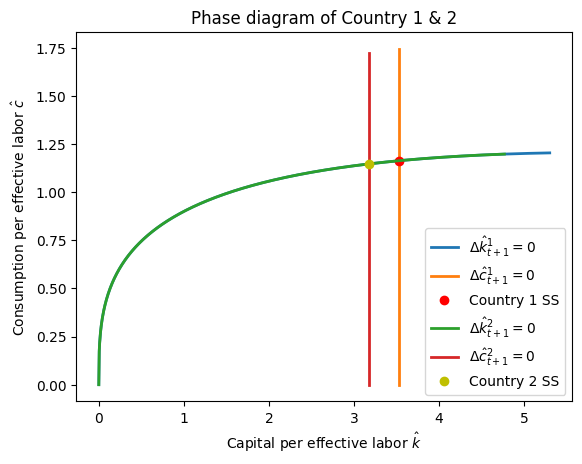

In [35]:
# Define common parameters
params = {'δ':0.1, 'α':0.33, 'σ':2, 'β':0.96}
# Define tax related parameters
tax_params_1 = {'tau_a':0, 'tau_f':0, 'tau_c':0, 'tau_w':0, 'g':0}
tax_params_2 = {'tau_a':0.2, 'tau_f':0, 'tau_c':0, 'tau_w':0, 'g':0}

# Solve the model and plot phase diagram
solution(params, tax_params_1, tax_params_2)

We should note that whole amount of tax revenue collected from capital gain tax is returned to households in the form of government transfers. Therefore, there is no impact on household's budget constraint in terms of total resources available for consumption and saving. Meaning that households in both countries have the same intertemporal budget constraint.

However, capital tax lowers the compound return on savings leading to slower accumulation of capital stock in the second country. This incentivizes households to consume more in the present period relative to the future period what can be seen from the Euler equation. 

\begin{align}
\left(\frac{c_{t+1}}{c_{t}}\right)^{\sigma} & =\beta\left(1+(1-\tau^{a})(\alpha k_{t}^{\alpha-1}-\delta)\right) \\

\Delta\tau^\alpha>0 & \Rightarrow \frac{c_{t+1}}{c_{t}} \downarrow
\end{align}

In conclusion, the second country will have lower possible steady-state levels of capital per effective labor that leads to lower consumption per effective labor along the balanced growth path relative to the first country.


### Question 2

The following tax rates and government transfers are zero in the two countries:

\begin{align}
\tau, \tau^{c}, \tau^{a}, \tau^{w}, v
\end{align}

The firm tax rate and government spending (fraction of output) are zero in the first but positive in the second country:

\begin{align}
\tau^{f}_{1}=g_{1}=G_{1}/Y_{1}=0\\
\tau^{f}_{2}=0.2,g_{2}=G_{2}/Y_{2}=0.2
\end{align}

What is the impact of second country's fiscal policy on the levels of capital and consumption per effective labor along the balanced growth path relative to the first country? Explain.

(3.5328789171564186, 1.1633520474676697)
(3.177882143898167, 0.8538552022999121)
       message: Optimization terminated successfully.
       success: True
        status: 0
           fun: 0.026323527867729863
             x: [ 3.874e-01]
           nit: 37
          nfev: 74
 final_simplex: (array([[ 3.874e-01],
                       [ 3.874e-01]]), array([ 2.632e-02,  2.633e-02]))
       message: Optimization terminated successfully.
       success: True
        status: 0
           fun: 0.00021448457811795493
             x: [ 3.010e-01]
           nit: 38
          nfev: 76
 final_simplex: (array([[ 3.010e-01],
                       [ 3.010e-01]]), array([ 2.145e-04,  2.317e-04]))


C:\Users\aaa\AppData\Local\Temp\ipykernel_113820\3312816962.py:14: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  c_t[0] = c_0


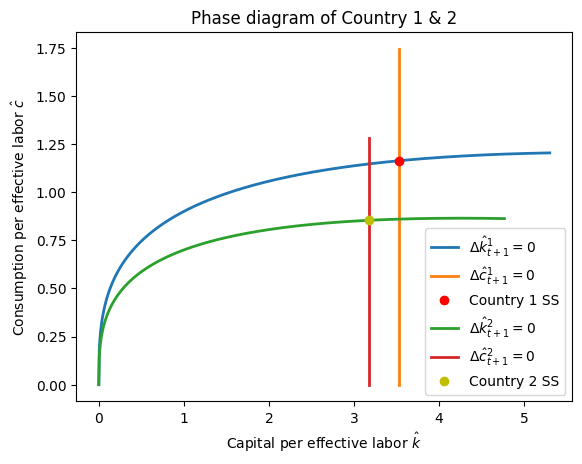

In [36]:
# Define common parameters
params = {'δ':0.1, 'α':0.33, 'σ':2, 'β':0.96}
# Define tax related parameters
tax_params_1 = {'tau_a':0, 'tau_f':0, 'tau_c':0, 'tau_w':0, 'g':0}
tax_params_2 = {'tau_a':0, 'tau_f':0.2, 'tau_c':0, 'tau_w':0, 'g':0.2}


# Solve the model and plot phase diagram
solution(params, tax_params_1, tax_params_2)

### Question 3

The following tax rates and government transfers are zero in the two countries:

\begin{align}
\tau, \tau^{a}, \tau^{f}, \tau^{w}, v
\end{align}

The consumption tax rate and government spending (fraction of output) are zero in the first but positive in the second country:

\begin{align}
\tau^{c}_{1}=g_{1}=G_{1}/Y_{1}=0\\
\tau^{c}_{2}=0.2,g_{2}=G_{2}/Y_{2}=0.2
\end{align}

What is the impact of second country's fiscal policy on the levels of capital and consumption per effective labor along the balanced growth path relative to the first country? Explain.

(3.5328789171564186, 1.1633520474676697)
(3.5328789171564186, 0.8600240596310074)
       message: Optimization terminated successfully.
       success: True
        status: 0
           fun: 0.026323527867729863
             x: [ 3.874e-01]
           nit: 37
          nfev: 74
 final_simplex: (array([[ 3.874e-01],
                       [ 3.874e-01]]), array([ 2.632e-02,  2.633e-02]))
       message: Optimization terminated successfully.
       success: True
        status: 0
           fun: 0.002421080638145049
             x: [ 2.767e-01]
           nit: 34
          nfev: 68
 final_simplex: (array([[ 2.767e-01],
                       [ 2.767e-01]]), array([ 2.421e-03,  2.437e-03]))


C:\Users\aaa\AppData\Local\Temp\ipykernel_113820\3312816962.py:14: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  c_t[0] = c_0


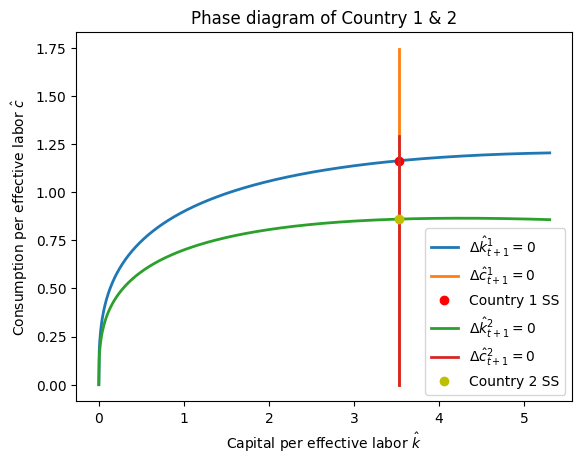

In [37]:
# Define common parameters
params = {'δ':0.1, 'α':0.33, 'σ':2, 'β':0.96}
# Define tax related parameters
tax_params_1 = {'tau_a':0, 'tau_f':0, 'tau_c':0, 'tau_w':0, 'g':0}
tax_params_2 = {'tau_a':0, 'tau_f':0, 'tau_c':0.2, 'tau_w':0, 'g':0.2}


# Solve the model and plot phase diagram
solution(params, tax_params_1, tax_params_2)